**Description:**

This Python code is an implementation of a deep learning model for classifying images from the Fashion MNIST dataset using TensorFlow and Keras. The Fashion MNIST dataset contains grayscale images of various clothing items, each belonging to one of ten classes. Here's a brief overview of what the code does:



1.   Imports necessary libraries, including TensorFlow, Keras, and other dependencies.
2.   Loads the Fashion MNIST dataset, which consists of training and testing images and their corresponding labels.
1.   Normalizes the pixel values of the images to the range [0, 1].
2.   Defines a neural network model using Keras with a Flatten layer, Dropout layer, and two dense layers.
1.   Specifies the Adam optimizer with a learning rate schedule.
2.   Sets up callbacks for learning rate scheduling and TensorBoard for monitoring training.
1.   Trains the model on the training data, recording training and validation accuracy and loss.
2.   Plots training and validation accuracy and loss over epochs.
1.   Evaluates the model on the test dataset and prints the test accuracy.
2.   Defines a probability model and uses it to make predictions on test images, showing the predicted class and actual label for a specific example.

This code provides a complete pipeline for building, training, and evaluating a deep learning model for Fashion MNIST image classification.









In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten , Dropout
from keras.optimizers import Adam
%matplotlib inline

# Import the Fashion MNIST dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

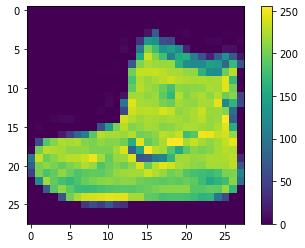

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Build the model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
def scheduler (epoch):
    if epoch < 2:
        return 0.001
    elif epoch < 6:
        return 0.0001
    else:
        return 0.00001

learning_rate_scheduler = LearningRateScheduler(scheduler , verbose = 1)

In [ ]:
logDir = "E:\\SRU-deeplearning-workshop-master\\homework\\Fashion_MNIST_log\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("logDir:" ,logDir )
tensorboard_callback = TensorBoard(logDir , histogram_freq = 1)

logDir: E:\SRU-deeplearning-workshop-master\homework\Fashion_MNIST_log\20210319-211955


In [ ]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50 ,batch_size=65,
                    validation_data = (test_images, test_labels),
                   callbacks = [tensorboard_callback ,learning_rate_scheduler ])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/50
924/924 [==============================] - 2s 2ms/step - loss: 0.3635 - accuracy: 0.8637 - val_loss: 0.3544 - val_accuracy: 0.8699

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/50
924/924 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8636 - val_loss: 0.3449 - val_accuracy: 0.8749

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 3/50
924/924 [==============================] - 2s 2ms/step - loss: 0.3435 - accuracy: 0.8718 - val_loss: 0.3345 - val_accuracy: 0.8771

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 4/50
924/924 [==============================] - 2s 2ms/step - loss: 0.3370 - accuracy: 0.8735 - val_loss: 0.3332 - val_accuracy: 0.8778

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0001.
Epoch 5/50
924/924 [==============================] - 2s 2ms/step - loss: 0.3351 - a

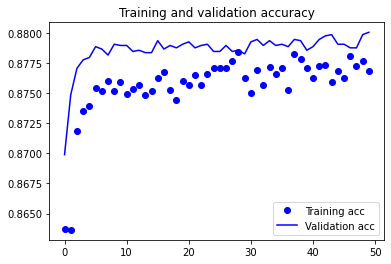

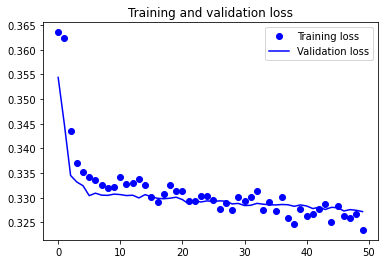

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3272 - accuracy: 0.8801

Test accuracy: 0.8801000118255615


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[1]
print(np.argmax(predictions[1]))
print(test_labels[1])

2
2
